CODE BLOCK: 1

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms

CODE BLOCK: 2

In [4]:
# CUDA?
!pip install torchsummary
from torchsummary import summary
use_cuda = torch.cuda.is_available()
cuda = torch.cuda.is_available()
print("CUDA Available?", cuda)
device = torch.device("cuda" if use_cuda else "cpu")

CUDA Available? True


CODE BLOCK: 3

In [5]:
# Train data transformations
train_transforms = transforms.Compose([
    transforms.RandomApply([transforms.CenterCrop(22), ], p=0.1),
    transforms.Resize((28, 28)),
    transforms.RandomRotation((-15., 15.), fill=0),
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,)),
    ])

# Test data transformations
test_transforms = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1407,), (0.4081,))
    ])

CODE BLOCK: 4

In [6]:
train_data = datasets.MNIST('../data', train=True, download=True, transform=train_transforms)
test_data = datasets.MNIST('../data', train=True, download=True, transform=train_transforms)

100%|██████████| 9912422/9912422 [00:00<00:00, 91506315.08it/s]


Extracting ../data/MNIST/raw/train-images-idx3-ubyte.gz to ../data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 59820095.72it/s]


Extracting ../data/MNIST/raw/train-labels-idx1-ubyte.gz to ../data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 41695905.69it/s]


Extracting ../data/MNIST/raw/t10k-images-idx3-ubyte.gz to ../data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 20888737.68it/s]


Extracting ../data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ../data/MNIST/raw



CODE BLOCK: 5

In [7]:
batch_size = 512

kwargs = {'batch_size': batch_size, 'shuffle': False, 'num_workers': 2, 'pin_memory': True}

test_loader = torch.utils.data.DataLoader(train_data, **kwargs)
train_loader = torch.utils.data.DataLoader(train_data, **kwargs)

CODE BLOCK: 6

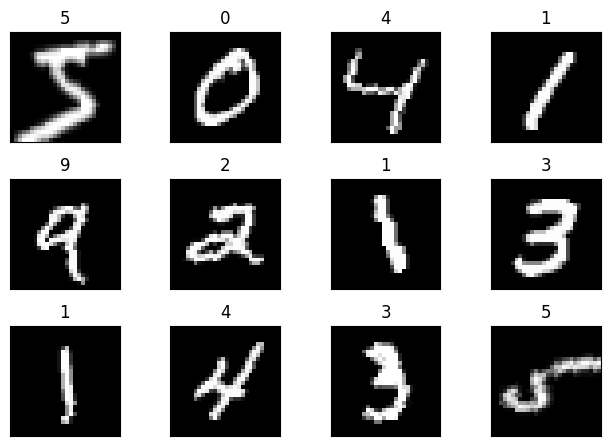

In [8]:
import matplotlib.pyplot as plt

batch_data, batch_label = next(iter(train_loader))

fig = plt.figure()

for i in range(12):
  plt.subplot(3,4,i+1)
  plt.tight_layout()
  plt.imshow(batch_data[i].squeeze(0), cmap='gray')
  plt.title(batch_label[i].item())
  plt.xticks([])
  plt.yticks([])

CODE BLOCK: 7

In [9]:
from model import Net
from utils import GetCorrectPredCount,train,test,plot


CODE BLOCK: 8

In [10]:
# Data to plot accuracy and loss graphs
train_losses = []
test_losses = []
train_acc = []
test_acc = []

test_incorrect_pred = {'images': [], 'ground_truths': [], 'predicted_vals': []}

CODE BLOCK: 9

CODE BLOCK: 10

In [12]:
model = Net().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=15, gamma=0.1, verbose=True)
# New Line
criterion = F.nll_loss
num_epochs = 20
for epoch in range(1, num_epochs+1):
  print(f'Epoch {epoch}')
  train_acc,train_losses=train(model, device, train_loader, optimizer, criterion,train_losses,train_acc)
  test_acc,test_losses=test(model, device, train_loader, criterion,test_losses,test_acc)
  scheduler.step()

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 1


Train: Loss=2.1412 Batch_id=117 Accuracy=24.55: 100%|██████████| 118/118 [00:20<00:00,  5.67it/s]


Test set: Average loss: 2.0416, Accuracy: 18442/60000 (30.74%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 2


Train: Loss=0.3659 Batch_id=117 Accuracy=72.78: 100%|██████████| 118/118 [00:21<00:00,  5.55it/s]


Test set: Average loss: 0.2578, Accuracy: 55165/60000 (91.94%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 3


Train: Loss=0.2795 Batch_id=117 Accuracy=94.28: 100%|██████████| 118/118 [00:21<00:00,  5.45it/s]


Test set: Average loss: 0.1326, Accuracy: 57495/60000 (95.83%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 4


Train: Loss=0.2098 Batch_id=117 Accuracy=96.13: 100%|██████████| 118/118 [00:20<00:00,  5.83it/s]


Test set: Average loss: 0.1017, Accuracy: 58077/60000 (96.80%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 5


Train: Loss=0.1520 Batch_id=117 Accuracy=96.94: 100%|██████████| 118/118 [00:20<00:00,  5.68it/s]


Test set: Average loss: 0.0854, Accuracy: 58352/60000 (97.25%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 6


Train: Loss=0.1328 Batch_id=117 Accuracy=97.53: 100%|██████████| 118/118 [00:19<00:00,  5.97it/s]


Test set: Average loss: 0.0784, Accuracy: 58505/60000 (97.51%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 7


Train: Loss=0.1579 Batch_id=117 Accuracy=97.68: 100%|██████████| 118/118 [00:19<00:00,  6.11it/s]


Test set: Average loss: 0.0715, Accuracy: 58642/60000 (97.74%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 8


Train: Loss=0.1581 Batch_id=117 Accuracy=98.03: 100%|██████████| 118/118 [00:19<00:00,  6.08it/s]


Test set: Average loss: 0.0644, Accuracy: 58789/60000 (97.98%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 9


Train: Loss=0.1539 Batch_id=117 Accuracy=98.19: 100%|██████████| 118/118 [00:20<00:00,  5.79it/s]


Test set: Average loss: 0.0630, Accuracy: 58780/60000 (97.97%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 10


Train: Loss=0.1364 Batch_id=117 Accuracy=98.25: 100%|██████████| 118/118 [00:19<00:00,  5.97it/s]


Test set: Average loss: 0.0546, Accuracy: 58947/60000 (98.25%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 11


Train: Loss=0.1299 Batch_id=117 Accuracy=98.42: 100%|██████████| 118/118 [00:20<00:00,  5.66it/s]


Test set: Average loss: 0.0487, Accuracy: 59051/60000 (98.42%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 12


Train: Loss=0.1038 Batch_id=117 Accuracy=98.52: 100%|██████████| 118/118 [00:21<00:00,  5.51it/s]


Test set: Average loss: 0.0508, Accuracy: 59006/60000 (98.34%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 13


Train: Loss=0.1058 Batch_id=117 Accuracy=98.59: 100%|██████████| 118/118 [00:20<00:00,  5.65it/s]


Test set: Average loss: 0.0439, Accuracy: 59146/60000 (98.58%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 14


Train: Loss=0.0922 Batch_id=117 Accuracy=98.61: 100%|██████████| 118/118 [00:21<00:00,  5.59it/s]


Test set: Average loss: 0.0416, Accuracy: 59193/60000 (98.66%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 15


Train: Loss=0.0793 Batch_id=117 Accuracy=98.72: 100%|██████████| 118/118 [00:20<00:00,  5.65it/s]


Test set: Average loss: 0.0384, Accuracy: 59246/60000 (98.74%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 16


Train: Loss=0.0650 Batch_id=117 Accuracy=98.95: 100%|██████████| 118/118 [00:19<00:00,  5.91it/s]


Test set: Average loss: 0.0307, Accuracy: 59399/60000 (99.00%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 17


Train: Loss=0.0475 Batch_id=117 Accuracy=99.06: 100%|██████████| 118/118 [00:19<00:00,  6.05it/s]


Test set: Average loss: 0.0311, Accuracy: 59408/60000 (99.01%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 18


Train: Loss=0.0703 Batch_id=117 Accuracy=99.09: 100%|██████████| 118/118 [00:20<00:00,  5.86it/s]


Test set: Average loss: 0.0295, Accuracy: 59435/60000 (99.06%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 19


Train: Loss=0.0614 Batch_id=117 Accuracy=99.02: 100%|██████████| 118/118 [00:20<00:00,  5.77it/s]


Test set: Average loss: 0.0287, Accuracy: 59444/60000 (99.07%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 20


Train: Loss=0.0295 Batch_id=117 Accuracy=99.06: 100%|██████████| 118/118 [00:19<00:00,  5.94it/s]


Test set: Average loss: 0.0284, Accuracy: 59452/60000 (99.09%)

Adjusting learning rate of group 0 to 1.0000e-03.


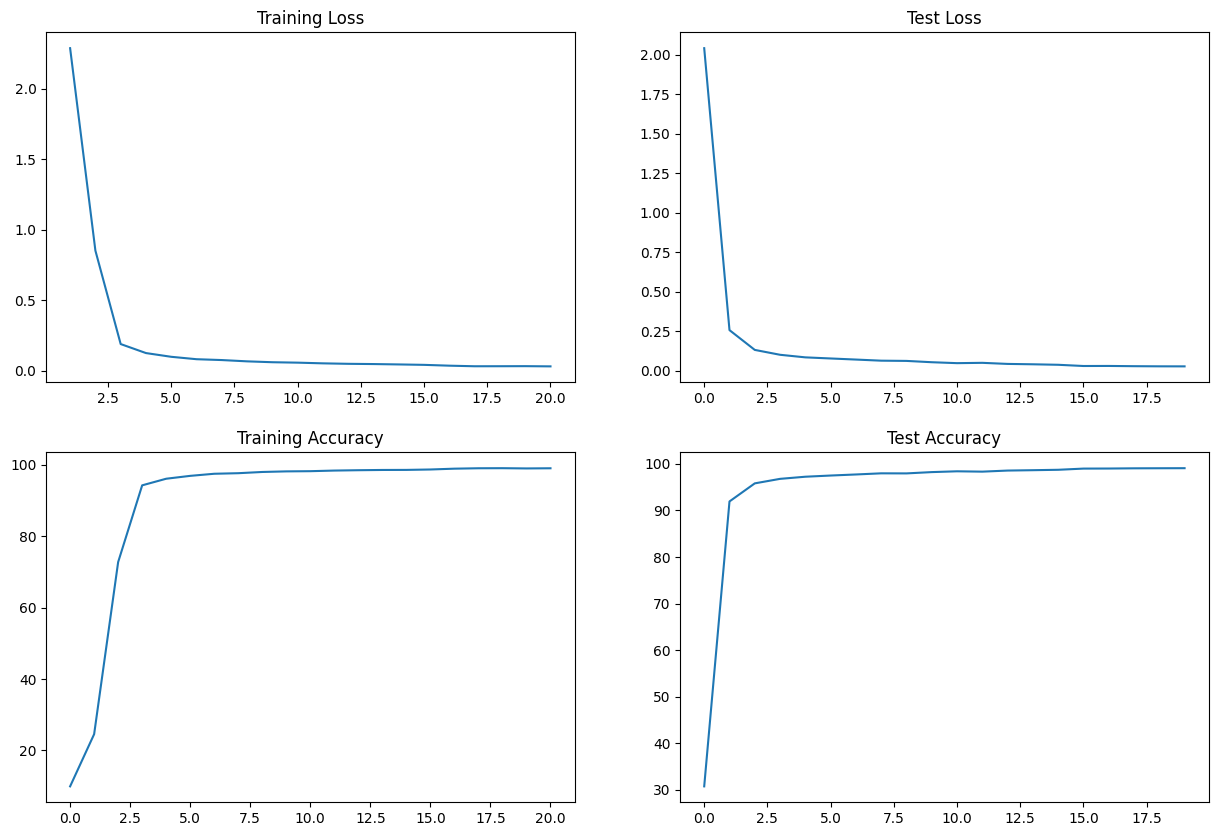

In [13]:
plot(train_losses,train_acc,test_losses,test_acc)

In [14]:
!pip install torchsummary
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
model = Net().to(device)
summary(model, input_size=(1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 26, 26]             320
            Conv2d-2           [-1, 64, 24, 24]          18,496
            Conv2d-3          [-1, 128, 10, 10]          73,856
            Conv2d-4            [-1, 256, 8, 8]         295,168
            Linear-5                   [-1, 50]         204,850
            Linear-6                   [-1, 10]             510
Total params: 593,200
Trainable params: 593,200
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.67
Params size (MB): 2.26
Estimated Total Size (MB): 2.94
----------------------------------------------------------------
